# Tarea 15

In [30]:
__precompile__() # Este comando es para que julia precompile el paquete

module herramientas
using SymPy, PyPlot
export metodo_newton,trapecio, rectangulo, metodo_simpson, euler, RK4vec, eulerimplicito

"""documentación del método de Newton"""
function metodo_newton(f,df,x0)
    x=x0
    for i in 1:20
       x=x-f(x)/df(x) 
    end
    return x
end
function trapecio(f,a,b,n) #Creamos una función que toma como entrada la función f, el intervalo (a,b) y la cantidad de diferencias finitas n
    x=a # Se toma como primer valor la variable a
    I=0 # Iniciamos  el valor de la integral en cero 
    dn=(b-a)/n # definimos el tamaño de la diferencia finita
    while x<b #damos la condición de iteración hata valores menores que b
        x=x+dn #iteramos en caca punto del intervalo
        I += (b-a)*(f(x)+f(x+dn))/2n #Se define la iteración en la integral dada por el método del rectángulo
    end
   return I  #Se regresa el valor de la integral
end
function rectangulo(f,a,b,n) #Creamos una función que toma como entrada la función f, el intervalo (a,b) y la cantidad de diferencias finitas n
    x=a # Se toma como primer valor la variable a
    I=0 # Iniciamos  el valor de la integral en cero 
    dn=(b-a)/n # definimos el tamaño de la diferencia finita
    while x<b
        x=x+dn
        I += ((b-a)/n)*f(x+(dn/2))
    end
   return I # se regresa el valor de la integral
end
function metodo_simpson(f,a,b,n) 
    x = a
    I = 0
    dn=(b-a) / n
    while x < b
        x = x + dn
        I += (b - a) * (f(x) + 4 * f(x + dn/2) + f(x + dn))/ 6n
    end
   return I #Se regresa el valor de la integral.
end
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end
function RK4vec(f,list,x0)#se cre la función que toma como entradas, la función vectorial, lista de tiempo y la condición
    #inicial x(0)
     x = x0#se inicia la variable x en x(0)
     h = list[2]-list[1]#calculamos el tamaño del paso
     listx=[]#se crea la lista  para posteriormente guardar los datos
     push!(listx,x)#se  gurada la los valores de x en listx
    for i in 2:length(list)#en este for se realiza el método de euler para todos los elementos de la listax
    t = i*h#asigna los valores de tiempo
    k1=f(x,t)#se definen todos los coeficientes del método de Runge Kutta de O(4)
    k2=f(x+((h/2)*k1),t+h/2)
    k3=f(x+((h/2)*k2),t+h/2)
    k4=f(x+h*k3,t+h)
    x=x+ (h/6)*(k1+2*k2+2*k3+k4)
    push!(listx,x) #se  gurada la los valores de x en listx
     end
     return listx#se regresa la lista x
end
function eulerimplicito(f,x0,listt)#se crea la función que toma como entrada la función de la Ec. diferencial, 
    listx=zeros(length(listt)) #la condición inicial x0  y la lista con el tiempo t
    h=listt[2]-listt[1]#se calcula el tamaño del paso h
    listx[1]=x0 #se inicia la lista de los valores de x con x0
    x=x0#iniciamos la variable x en x0
    xk=x0#una primera aproximación de xk es x0
for i in 1:length(listt)-1#en este for se define cada  función y su derivada a usar en el método de Newton, tantas como
    listxk=zeros(100)#los elementos de la lista en t menos 1
    g(x)= x-xk-h* f(listt[i+1],x)# se define la función g a usar en M. de Newton
    g´(x)=1 - (f(listt[i+1],x+h)-f(listt[i+1],x))#se calcula la derivada de g como g´=(f(t,x+h)-f(t,x))/h
for l in 1:100#el ciclo for para obtener el primer valor de x para una función g dada
    x=x-g(x)/g´(x)#m. de Newton
    listxk[l]=x#se guarda cada valor de x en listxk
end 
    listx[i+1]=listxk[100]#guardamos el último valor obtenido por el m. de Newton 
                           #como un el elemento x_i+1 de la lista de x para una g(x) dada
    xk=listxk[100]        #asignamos el  valor de la raiz obtenida a la  constante xk_i+1
    x=listxk[100]        #asignamos en valor de la raiz como primera aproximación de la siguiente raiz de la función
end              #g(t_i+1,x)
return listt, listx #se regresa las listas con la solución numérica de x y la lista de tiempo original
end
end

herramientas

In [3]:
herramientas.metodo_newton(x->x^2-2,x->2*x,1)#calculamos las raices por el método de newton

1.414213562373095

In [2]:
herramientas.trapecio(cos,0,pi/2,1000000) #se integra  por método de trapecio

0.9999984292022969

In [6]:
herramientas.rectangulo(cos,0,pi/2,1000000)#se integra por método de rectángulo

0.9999984292026093

In [8]:
herramientas.metodo_simpson(cos,0,pi/2,10000)#se integra por método de rectángulo

0.9998429080308678

In [25]:
f(x,t) = [x[2],-x[1]-x[2]]#se crea la función del oscilador armónico amortiguado

f (generic function with 1 method)

In [26]:
list=0:0.1:200; #se cre la lista de t
vec=herramientas.euler(f,list,[1,0]); #definimos un vector donde usando método de euler con  x(0)=1, x'(0)=1
vec1=herramientas.RK4vec(f,list,[1,0]); #definimos un vector donde usando método de Runge Kutta con  x(0)=1, x'(0)=1

In [28]:
listx1=map(x->x[1],vec);#se crea una lista donde se evalua  v en el método de euler explicito
listx2=map(x->x[2],vec);#se crea una lista donde se evalua  x en el método de euler explicito
listx3=map(x->x[1],vec1);#se crea una lista donde se evalua  x en el método de Runge Kutta 
listx4=map(x->x[2],vec1);#se crea una lista donde se evalua  v en el método de Runge Kutta 
using PyPlot

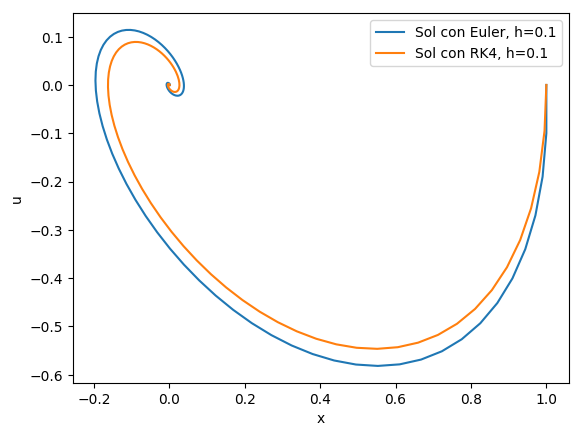

In [29]:
xlabel("x");ylabel("u")

plot(listx1,listx2,label="Sol con Euler, h=0.1");#se grafica x vs v para método de euler explicito
plot(listx3,listx4,label="Sol con RK4, h=0.1");#se grafica x vs v para Runge Kutta
legend()

In [36]:
F(x,t)=x
listt=linspace(0,8,101)#se crea la lista con el intervalo de tiempo con h=0.08

101-element LinSpace{Float64}:
 0.0,0.08,0.16,0.24,0.32,0.4,0.48,0.56,…,7.44,7.52,7.6,7.68,7.76,7.84,7.92,8.0

In [40]:
(listt,listx)=herramientas.eulerimplicito(F,1,listt)#se asignan los valores a la lista de x y tiempo

(linspace(0.0,8.0,101),[1.0,0.9936,0.9808,0.9616,0.936,0.904,0.8656,0.8208,0.7696,0.712  …  -25.7904,-26.3792,-26.9744,-27.576,-28.184,-28.7984,-29.4192,-30.0464,-30.68,-31.32])

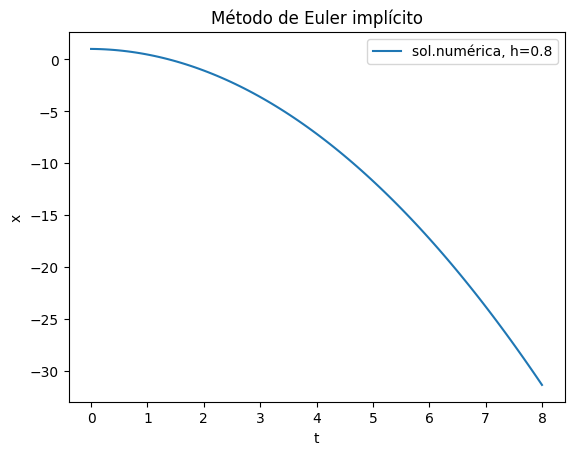

PyObject <matplotlib.legend.Legend object at 0x7fd85abf3f10>

In [42]:

plot(listt,listx,label="sol.numérica, h=0.8")
xlabel("t");ylabel("x")
title("Método de Euler implícito")
legend()#se grafica por euler implicito la solución

In [43]:
?herramientas.metodo_newton

documentación del método de Newton


In [44]:
import herramientas.jl#se importan las herramientas

In [45]:
herramientas.metodo_newton(x->x^2-2,x->2*x,1)

1.414213562373095